# Pré-processamento e Visualização

A seguir teremos o pré-processamento da base de imagens sobre pneumonia disponibilizada pela [kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia), além da visualização de uma imagem de cada classe.

**Importação de bibliotecas necessárias**

In [23]:
from imutils import paths
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

**Tamanho da imagem para redimensão e caminho das imagens:**

In [2]:
image_size = 224
imagePaths = list(paths.list_images('dataset'))


**Definição dos vetores de imagens e labels**

>Obs.: Teremos 3 vetores de imagens, que se dividem em imagens de treinamento, testes e validação

In [3]:
#Conjunto de teste
data_test = []


#Conjunto de treinamento
data_train= []


#Conjunto de validação
data_val = []


**Leitura das imagens e inserções nos vetores:**

In [4]:
labels = ['PNEUMONIA', 'NORMAL']

for path in imagePaths:
    label = path.split(os.path.sep)[-2]
    type = path.split(os.path.sep)[-3]
    
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (image_size, image_size))
    if label == 'PNEUMONIA':
        if type == 'train':
            data_train.append([image, 0])
        elif type == 'test':
            data_test.append([image, 0])
        else:
            data_val.append([image, 0])
    elif label == 'NORMAL':
        if type == 'train':
            data_train.append([image, 1])
        elif type == 'test':
            data_test.append([image, 1])
        else:
            data_val.append([image, 1])

data_train = np.array(data_train)
data_test = np.array(data_test)
data_val = np.array(data_val)

/tmp/ipykernel_9676/3724120664.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_train = np.array(data_train)
/tmp/ipykernel_9676/3724120664.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_test = np.array(data_test)
/tmp/ipykernel_9676/3724120664.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_val = np.array

**Conversão dos dados e balanceamento dos dados:**

A intensidade dos pixels será convertida para os valores __[0,1]__, além de convertê-los para o tipo de array fornecido pela _numpy_

In [5]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

normal_aux = []
pneumonia_aux = []
for image, label in data_train:
        if label == 0:
            normal_aux.append([image, label])
        else:
            pneumonia_aux.append([image, label])
range_ = 0
if len(normal_aux) > len(pneumonia_aux) : range_ = len(pneumonia_aux)
else: range_ = len(normal_aux)

normal_aux = np.array(normal_aux)
pneumonia_aux = np.array(pneumonia_aux)

for i in range(range_):
    image_normal, label_normal = normal_aux[i]
    x_train.append(image_normal)
    y_train.append(label_normal)
    image_pneumonia, label_pneumonia = pneumonia_aux[i]
    x_train.append(image_pneumonia)
    y_train.append(label_pneumonia)


normal_aux = []
pneumonia_aux = []
for image, label in data_test:
        if label == 0:
            normal_aux.append([image, label])
        else:
            pneumonia_aux.append([image, label])
range_ = 0
if len(normal_aux) > len(pneumonia_aux) : range_ = len(pneumonia_aux)
else: range_ = len(normal_aux)

for i in range(range_):
    image_normal, label_normal = normal_aux[i]
    x_test.append(image_normal)
    y_test.append(label_normal)
    image_pneumonia, label_pneumonia = pneumonia_aux[i]
    x_test.append(image_pneumonia)
    y_test.append(label_pneumonia)

for image, label in data_val:
    x_val.append(image)
    y_val.append(label)

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

y_train = np.array(y_train)
y_teste = np.array(y_test)
y_val = np.array(y_val)

del normal_aux
del pneumonia_aux
del data_test
del data_train
del data_val

/tmp/ipykernel_9676/69046422.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  normal_aux = np.array(normal_aux)
/tmp/ipykernel_9676/69046422.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pneumonia_aux = np.array(pneumonia_aux)


In [6]:
print(y_train.shape)
print(x_train.shape)

(2682,)
(2682, 224, 224)


**Distribuição dos dados de treinamento:**

/home/dethrak/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

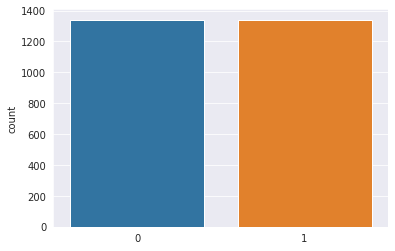

In [7]:
sns.set_style('darkgrid')
sns.countplot(y_train)



**Distribuição dos dados de testes:**

/home/dethrak/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

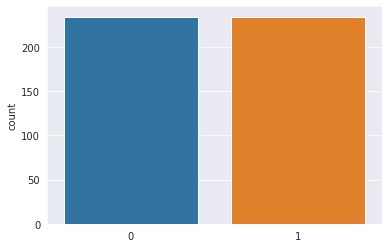

In [8]:
sns.countplot(y_test)

**Distribuição dos dados de validação:**

/home/dethrak/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

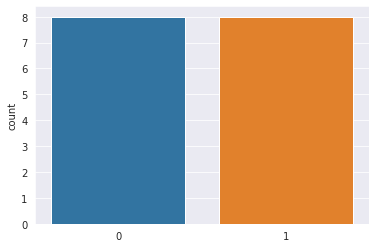

In [9]:
sns.countplot(y_val)

## Visualização dos dados

**Visualização de uma image da classe Normal:**

Text(0.5, 1.0, 'NORMAL')

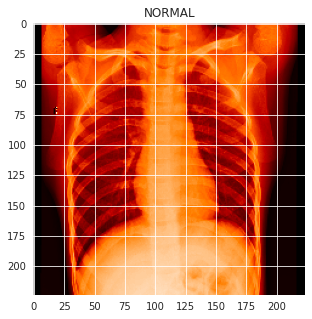

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(x_test[1], cmap='gist_heat')
plt.title('NORMAL')

**Visualização de uma imagem da classe Pneumonia:**

Text(0.5, 1.0, 'PNEUMONIA')

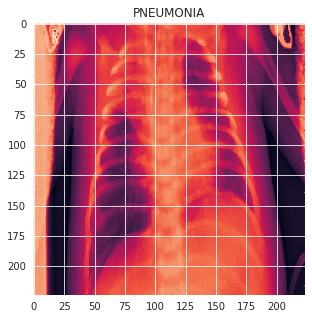

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(x_test[0])
plt.title('PNEUMONIA')

# Treinamento e predição

**Redimensionando imagens para o deep learning**

In [12]:
x_train = x_train.reshape(-1,image_size, image_size, 1)
x_val = x_val.reshape(-1,image_size, image_size, 1)
x_test = x_test.reshape(-1,image_size, image_size, 1)
print(y_train.shape)
print(x_train.shape)

(2682,)
(2682, 224, 224, 1)


**Definindo cabeçalhos para as imagens que serão usadas pelo tensorflow**

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30,  
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False)  

**Ajusta imagens com os cabeçalhos definidos**

In [14]:
datagen.fit(x_train)

**Adiciona layes na rede neural convolucional**

In [15]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

2021-08-26 19:28:26.974323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-26 19:28:27.016253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-26 19:28:27.016616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.665GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 119.24GiB/s
2021-08-26 19:28:27.016730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-26 19:28:27.016818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libra

**Definição da redução do learning rate**

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

**Treinando CNN com as imagens de treinamento**

In [17]:
model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12,
                    validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

2021-08-26 19:28:27.406488: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-26 19:28:27.406836: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3601000000 Hz


Epoch 1/12
84/84 [==============================] - 105s 1s/step - loss: 1.2007 - accuracy: 0.8173 - val_loss: 3.6162 - val_accuracy: 0.5000
Epoch 2/12
84/84 [==============================] - 104s 1s/step - loss: 0.3641 - accuracy: 0.8691 - val_loss: 10.7689 - val_accuracy: 0.5000
Epoch 3/12
84/84 [==============================] - 104s 1s/step - loss: 0.2940 - accuracy: 0.9008 - val_loss: 25.2063 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
84/84 [==============================] - 104s 1s/step - loss: 0.2189 - accuracy: 0.9236 - val_loss: 17.1448 - val_accuracy: 0.5000
Epoch 5/12
84/84 [==============================] - 112s 1s/step - loss: 0.1978 - accuracy: 0.9355 - val_loss: 20.7999 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 6/12
84/84 [==============================] - 115s 1s/step - loss: 0.1521 - accuracy: 0.9437 - val_loss: 17.0980 - val_accu

**Realizando predições e apresentando report de classificação**

In [21]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test,predictions, target_names=['PNEUMONIA (0)', 'NORMAL (1)']))

/home/dethrak/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


               precision    recall  f1-score   support

PNEUMONIA (0)       0.88      0.87      0.87       234
   NORMAL (1)       0.87      0.88      0.87       234

     accuracy                           0.87       468
    macro avg       0.87      0.87      0.87       468
 weighted avg       0.87      0.87      0.87       468



**Matriz de confusão**

<AxesSubplot:>

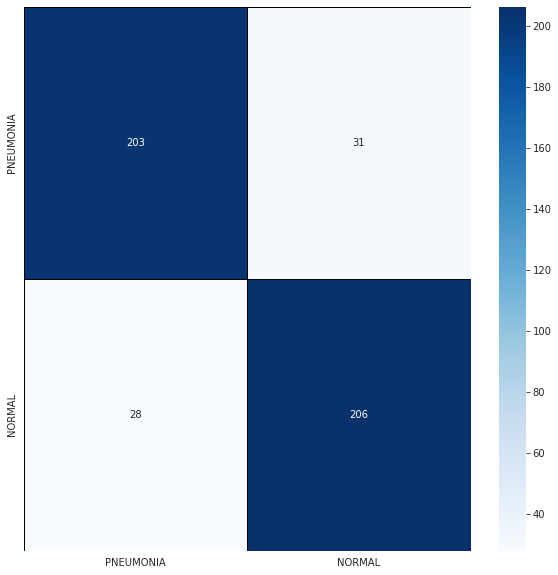

In [24]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, index = ['0', '1'], columns= ['0','1'])
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='Blues', linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)